# **Data Preproccessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ds = pd.read_csv('prostate.txt', delimiter = '\t')
ds = ds.drop(columns=['Unnamed: 0', 'train'], axis=1)
ds.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


**Above are the first few lines of the data set**

In [ ]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

**The Dataset is split into 80% train, 10% validation, and 10% test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)


In [ ]:
ds.corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


**Above is a correlation table similar to the one seen in the Table 2.2 in the textbook**

**Next the train, test, and validation data is all scaled and a column of 1s is appended to each in order to leave a spot for B_0**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.fit_transform(X_val)

In [ ]:
ones = np.ones((1,len(X_train)))
X_train = np.insert(X_train, 0, ones, axis=1)

ones = np.ones((1,len(X_val)))
X_val = np.insert(X_val, 0, ones, axis=1)

ones = np.ones((1,len(X_test)))
X_test = np.insert(X_test, 0, ones, axis=1)

### **Part A: Plain Regression**

**Below is linear algebra to get values for the betas. The equation used is 3.7 from the textbook:**

**Beta = X(X^T * X)^-1 * X^T * y**

In [ ]:
#ADD COMMENT OF EQ IN
a = np.linalg.inv(np.matmul(np.transpose(X_train),X_train))
b = np.matmul(np.transpose(X_train),y_train)
beta = np.matmul(a,b)
print("Array of betas: " , beta)

Array of betas:  [ 2.42431671  0.56589844  0.24810855 -0.10187322  0.138415    0.36761646
 -0.08102235  0.1396668   0.06305269]


**Next from the betas calculated above, results for the test data were predicted**

In [ ]:
pred = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), beta)
  pred.append(f)

pred = np.array(pred)
print("Predictions: ", pred)

Predictions:  [4.45013963 1.27835923 0.67014922 1.43734157 2.57714564 1.8149912
 3.31785927 3.51878978 3.04757397 2.87568353]


In [ ]:
print(np.concatenate((pred.reshape(len(pred),1), y_test.reshape(len(y_test),1)),1))


[[ 4.45013963  2.5687881 ]
 [ 1.27835923  2.0215476 ]
 [ 0.67014922 -0.1625189 ]
 [ 1.43734157  1.2669476 ]
 [ 2.57714564  2.8124102 ]
 [ 1.8149912   1.8164521 ]
 [ 3.31785927  3.993603  ]
 [ 3.51878978  3.4578927 ]
 [ 3.04757397  2.9626924 ]
 [ 2.87568353  2.7180005 ]]


**Above is the table of the predicted results versus the test data. The predicted results are shown on the left side of the table. As seen from the table the predicted results using plain regressions seems to line up fairly close to the test data**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
print("MSE: ", mse)
baseline = []
avg = np.average(y_train)
for i in range(0, len(y_test)):
  baseline.append(avg)
baseline_mse = mean_squared_error(y_test, baseline)
print("baseline MSE: ", baseline_mse)
#standard_error = np.array(np.sqrt(np.diagonal(mse * np.linalg.inv(np.dot(X_test.T, X_test)))))
#print(standard_error)

MSE:  0.5361941241171013
baseline MSE:  1.2641469943172317


**As seen from the MSE for the preditions is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset**

**Below are calulations done for the standard error and z-score. The equation used to calculate the standard error is based off equation 3.8 from the textbook:**

**variance = (1/N - P - 1) * MSE    ; where N is the length of the X training data and P is the length of the beta array**

**standard error = squareroot((X^T * X)^-1 * var)**

**Z-score = beta/standard error**

In [ ]:
#ADD COMMENT OF EQ IN
N = len(X_train)
p = len(beta)

var = (1/(N-p-1)) * mse
#standard_error = var / (np.sqrt(N))
standard_error = np.sqrt(abs(np.linalg.inv(np.matmul(np.transpose(X_test), X_test)) * var))

standard_error1 = []
for i in range(0, len(standard_error)):
  standard_error1.append(standard_error[i][i])
#print(standard_error1)
standard_error1 = np.array(standard_error1)

z_score = []
#z_score1 = []
for i in range(0, len(standard_error1)):
  z_score.append(beta[i]/standard_error1[i])

#for i in range(0, len(z_score)):
# z_score1.append(np.mean(z_score[i]))


In [ ]:
terms = ['Intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
data = {'Term' : terms,
      'Coefficent' : beta, 
      'Std. Error' : standard_error1, 
      'Z Score' : z_score}
df2 = pd.DataFrame(data, columns=['Term', 'Coefficent', 'Std. Error', 'Z Score'])
df2

,Term,Coefficent,Std. Error,Z Score
0,Intercept,2.424317,0.053320,45.467428
1,lcavol,0.565898,0.088650,6.383510
2,lweight,0.248109,0.077596,3.197424
3,age,-0.101873,0.058779,-1.733152
4,lbph,0.138415,0.083950,1.648775
5,svi,0.367616,0.197825,1.858290
6,lcp,-0.081022,0.162827,-0.497597
7,gleason,0.139667,0.108125,1.291722
8,pgg45,0.063053,0.134717,0.468036


**Above is a coefficent table similar to table 2.3 in the textbook. The results in this table are similar to the onces the textbook got. The standard errors is fairly low, which again suggests that the linear model is good for this data set**

### **Part B: Ridge Regression**

**Before starting the calculation foor the betas for ridge regression I found it was better to drop the 1s columns in the train, test, and validation data in order for b_0 to not penalize the predictions**

In [ ]:
X_train = np.delete(X_train, 0, axis=1)
X_test = np.delete(X_test, 0, axis=1)
X_val = np.delete(X_val, 0, axis=1)

In [ ]:
b_0 = np.average(y_train)

**Below is the calulation for figuring out the best lambda. This was done by testing out 100 lambdas in the ranges 0.1 to 100. The equation used is 3.44 from the textbook:**

**beta_ridge = (X^T * X + lambda * I)^-1 * X^T * y**

In [ ]:
#ADD COMMENT OF EQ IN
c = np.matmul(np.transpose(X_train), X_train)
I = np.identity(8)
beta_ridge = []
lowest_error = 999
best_lambda = 0
lambda_list = []
for l in np.linspace(0.1, 100, 100) :
  lambda_list.append(l)

  #--------Getting beta_ridge--------------#

  d = l * I
  e = np.linalg.inv(c + d)
  g = np.matmul(e, np.transpose(X_train))
  r = np.matmul(g, y_train)
  beta_ridge.append(r)
  
  
  #--------Predicting validation data using beta_ridge--------------#

  pred2 = [];
  for i in range(0, len(X_val)):
    p = np.matmul(np.transpose(X_val[i]), r)
    p = p + b_0
    pred2.append(p)


  pred2 = np.array(pred2)
  #print(np.concatenate((pred2.reshape(len(pred2),1), y_val.reshape(len(y_val),1)),1))
  error = mean_squared_error(y_val, pred2)
  #print(error)

  #--------getting best error--------------#

  if error < lowest_error:
    lowest_error = error
    best_lambda = l
  
  
  
print("Lowest Error: ", lowest_error)
print("Best Lambda: ", best_lambda)

beta_ridge = np.array(beta_ridge)
lambda_list = np.array(lambda_list)
#beta_ridge = np.delete(beta_ridge, 0, axis=1)
#lambda_list = np.delete(lambda_list, 0)
#print(beta_ridge)
#print(lambda_list[i].size)

Lowest Error:  0.5573661911679411
Best Lambda:  0.1


**As seen the best lambda turns out to be 0.1**

In [ ]:
#ADD COMMENT OF EQ IN
d1 = best_lambda * I
e1 = np.linalg.inv(c + d1)
g1 = np.matmul(e1, np.transpose(X_train))
actual_beta_ridge = np.matmul(g1, y_train)

print("Beta ridge with best lambda: ", actual_beta_ridge)

Beta ridge with best lambda:  [ 0.56431981  0.24787504 -0.10130743  0.13806565  0.3669203  -0.07914978
  0.13938985  0.06298378]


In [ ]:
pred3 = [];
for i in range(0, len(X_test)):
  f = np.matmul(np.transpose(X_test[i]), actual_beta_ridge)
  f = f + b_0
  pred3.append(f)

pred3 = np.array(pred3)
print(np.concatenate((pred3.reshape(len(pred3),1), y_test.reshape(len(y_test),1)),1))
mse2 =  mean_squared_error(y_test, pred3)
print("MSE: ", mse2)

[[ 4.45025854  2.5687881 ]
 [ 1.27888813  2.0215476 ]
 [ 0.6727666  -0.1625189 ]
 [ 1.43821173  1.2669476 ]
 [ 2.57534406  2.8124102 ]
 [ 1.81549459  1.8164521 ]
 [ 3.31799817  3.993603  ]
 [ 3.52005476  3.4578927 ]
 [ 3.04616486  2.9626924 ]
 [ 2.87362358  2.7180005 ]]
MSE:  0.5366200834439725


**Above just as before is a table that compares the predicted with the actual values. Again all of the predictions are fairly close. The MSE is smaller than the baseline MSE, thus this is a pretty good model to use for the dataset. The Ridge regression MSE is a little bit smaller than the regular regression MSE, so this would be a slightly better model to use**

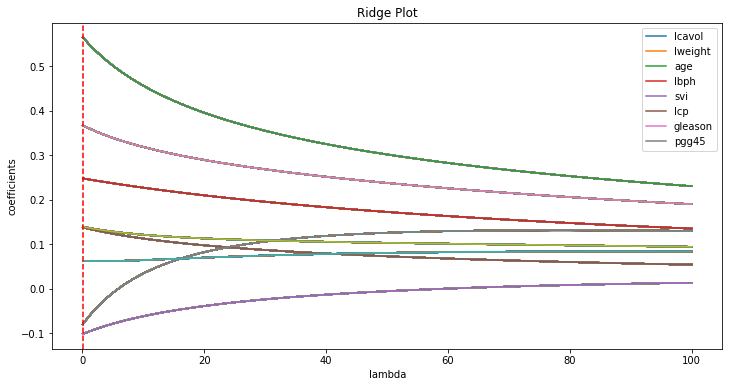

In [ ]:
from itertools import cycle
lab1 = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
plt.figure(figsize=(12,6))
for i in range(0,len(lambda_list)):
    plt.plot(lambda_list,beta_ridge, label=lab1)
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Ridge Plot')
plt.axis('tight')
plt.legend(lab1,loc=1,prop={'size': 10})
plt.axvline(x=(best_lambda), color = 'red', linestyle='--')
plt.show()

**Above is a ridge plot which shows lambdas versus the coefficents for each feature. The red line indicates the lambda that was used for predicting the test data**

### **Part C: Lasso Regression**

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import lasso_path
eps = 5e-3
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps)
neg_log_alphas_lasso = -np.log10(alphas_lasso)

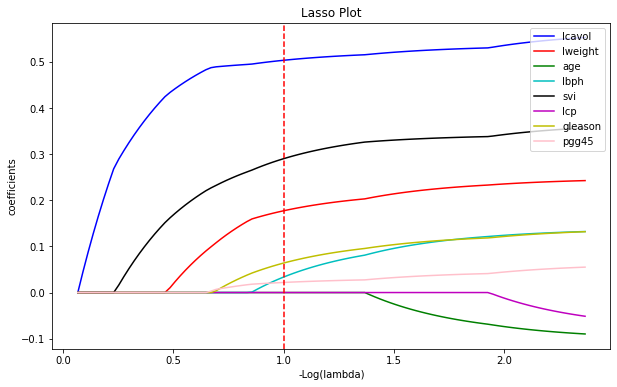

In [ ]:
lab = [ 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
plt.figure(figsize=(10,6))
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'y', 'pink'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, c in zip(coefs_lasso, colors):
  l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c, label=lab)
plt.xlabel('-Log(lambda)')
plt.ylabel('coefficients')
plt.title('Lasso Plot')
plt.axis('tight')
plt.legend(lab,loc=1,prop={'size': 10})
plt.axvline(x=(-np.log10(best_lambda)), color = 'red', linestyle='--')
plt.show()

**Above is a lasso plot of the train data, which graphs the -log of the lambdas versus the coefficients for each feature. Just as before the redline indicates the best lambda that was used for predicting the test data. The code for the graph is based off the following link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html**

In [ ]:
reg = linear_model.Lasso(alpha=best_lambda)
reg.fit(X_train, y_train)


pred5 = reg.predict(X_test)

print(np.concatenate((pred5.reshape(len(pred5),1), y_test.reshape(len(y_test),1)),1))
print("MSE: ", mean_squared_error(y_test, pred5))

[[ 4.0421731   2.5687881 ]
 [ 1.45778863  2.0215476 ]
 [ 1.10872424 -0.1625189 ]
 [ 1.70074894  1.2669476 ]
 [ 2.33215098  2.8124102 ]
 [ 1.71974813  1.8164521 ]
 [ 3.19779124  3.993603  ]
 [ 3.54828626  3.4578927 ]
 [ 2.89219868  2.9626924 ]
 [ 2.59602175  2.7180005 ]]
MSE:  0.5194266366399016


**Above again is a table that compares the predicted with the actual values for the lasso method. As seen the predictions are fairly close. The MSE is smaller than the baseline MSE, so lasso good model to use for the dataset. The lasso method MSE is a little bit smaller than the regular and ridge regression MSEs, overall lasso seems like the best model to use for this dataset.**

**In a seperate file this exact same procedure is followed on another dataset**